<h1> Spotify EDA<h1>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_tracks = pd.read_csv(r'dataset/tracks.csv')
df_tracks.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


<h1> Check NULL <h1>

In [17]:
df_tracks.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [18]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [19]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.0,13.0000,27.000000,41.00000,100.000
duration_ms,586672.0,230051.167286,126526.087418,3344.0,175093.0000,214893.000000,263867.00000,5621218.000
explicit,586672.0,0.044086,0.205286,0.0,0.0000,0.000000,0.00000,1.000
danceability,586672.0,0.563594,0.166103,0.0,0.4530,0.577000,0.68600,0.991
energy,586672.0,0.542036,0.251923,0.0,0.3430,0.549000,0.74800,1.000
key,586672.0,5.221603,3.519423,0.0,2.0000,5.000000,8.00000,11.000
loudness,586672.0,-10.206067,5.089328,-60.0,-12.8910,-9.243000,-6.48200,5.376
mode,586672.0,0.658797,0.474114,0.0,0.0000,1.000000,1.00000,1.000
speechiness,586672.0,0.104864,0.179893,0.0,0.0340,0.044300,0.07630,0.971
acousticness,586672.0,0.449863,0.348837,0.0,0.0969,0.422000,0.78500,0.996


In [20]:
print("Number of columns before drop duplicate values: ", df_tracks.shape)
# check duplicate values
df_tracks.drop_duplicates(subset = ["id"], inplace = True)
print("Number of columns after drop duplicate values: ", df_tracks.shape)

Number of columns before drop duplicate values:  (586672, 20)
Number of columns after drop duplicate values:  (586672, 20)


In [21]:
# check missing value
total = df_tracks.isnull().sum().sort_values(ascending = True)
percent = (df_tracks.isnull().sum() / df_tracks.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
id,0,0.0
valence,0,0.0
liveness,0,0.0
instrumentalness,0,0.0
acousticness,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
key,0,0.0
energy,0,0.0


<h3> Change duration column units <h3>


In [22]:
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: (x/1000)/60)
df_tracks.drop("duration_ms", inplace = True, axis = 1)

In [23]:
df_tracks.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,586672.0,27.570053,18.370642,0.000000,13.000000,27.000000,41.000000,100.000000
explicit,586672.0,0.044086,0.205286,0.000000,0.000000,0.000000,0.000000,1.000000
danceability,586672.0,0.563594,0.166103,0.000000,0.453000,0.577000,0.686000,0.991000
energy,586672.0,0.542036,0.251923,0.000000,0.343000,0.549000,0.748000,1.000000
key,586672.0,5.221603,3.519423,0.000000,2.000000,5.000000,8.000000,11.000000
loudness,586672.0,-10.206067,5.089328,-60.000000,-12.891000,-9.243000,-6.482000,5.376000
mode,586672.0,0.658797,0.474114,0.000000,0.000000,1.000000,1.000000,1.000000
speechiness,586672.0,0.104864,0.179893,0.000000,0.034000,0.044300,0.076300,0.971000
acousticness,586672.0,0.449863,0.348837,0.000000,0.096900,0.422000,0.785000,0.996000
instrumentalness,586672.0,0.113451,0.266868,0.000000,0.000000,0.000024,0.009550,1.000000


In [24]:
# 10 most popular songs on Spotify

most_popular = df_tracks[(df_tracks['popularity'] > 90)].sort_values(by = 'popularity', ascending = False)
most_popular.head(10)

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,4,3.301367
93803,7lPN2DXiMsVn7XUKtOW1CS,drivers license,99,1,['Olivia Rodrigo'],['1McMsnEElThX1knmY4oliG'],2021-01-08,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,4,4.033567
93804,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,0,['Masked Wolf'],['1uU7g3DNSbsu0QjSEqZtEd'],2021-01-06,0.778,0.695,4,-6.865,0,0.0913,0.17500,0.000000,0.1500,0.472,149.996,4,2.213000
92810,5QO79kh1waicV47BqGRL3g,Save Your Tears,97,1,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,4,3.593783
92811,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,0,['Kali Uchis'],['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,11,-9.016,0,0.0502,0.11200,0.000000,0.2030,0.553,83.970,4,2.669850
92813,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,96,0,['The Weeknd'],['1Xyo4u8uXC1ZmMpatF05PJ'],2020-03-20,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,4,3.334000
93805,7MAibcTli4IisCtbHKrGMh,Leave The Door Open,96,0,"['Bruno Mars', 'Anderson .Paak', 'Silk Sonic']","['0du5cEVh5yTK9QJze8zA0C', '3jK9MiCrA42lLAdMGU...",2021-03-05,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,4,4.034933
92814,6f3Slt0GbA2bPZlz0aIFXN,The Business,95,0,['Tiësto'],['2o5jDhtHVPhrJdv3cEQ99Z'],2020-09-16,0.798,0.620,8,-7.079,0,0.2320,0.41400,0.019200,0.1120,0.235,120.031,4,2.733333
91866,60ynsPSSKe6O3sfwRnIBRf,Streets,94,1,['Doja Cat'],['5cj0lLjcoR7YOSnhnX0Po5'],2019-11-07,0.749,0.463,11,-8.433,1,0.0828,0.20800,0.037100,0.3370,0.190,90.028,4,3.783117
92816,3FAJ6O0NOHQV8Mc5Ri6ENp,Heartbreak Anniversary,94,0,['Giveon'],['4fxd5Ee7UefO4CUXgwJ7IP'],2020-03-27,0.449,0.465,0,-8.964,1,0.0791,0.52400,0.000001,0.3030,0.543,89.087,3,3.306183


In [25]:
df_tracks.set_index("release_date", inplace = True)
df_tracks.index = pd.to_datetime(df_tracks.index)
df_tracks.head()

,id,name,popularity,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.115050
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.636667
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.027333
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.948450
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.718000


In [154]:
#find a certain artist
df_tracks[['artists']].iloc[18]

artists    ['Victor Boucher']
Name: 1922-01-01 00:00:00, dtype: object

In [26]:
df_tracks.duration.head()

release_date
1922-02-22    2.115050
1922-06-01    1.636667
1922-03-21    3.027333
1922-03-21    2.948450
1922-01-01    2.718000
Name: duration, dtype: float64

In [156]:
df_tracks.shape

(586672, 19)

In [157]:
df_tracks['explicit'].value_counts()
# Songs that are explicite are not as many as censored songs or normal songs.

0    560808
1     25864
Name: explicit, dtype: int64

In [158]:
df_tracks['speechiness'].value_counts()

0.0312    2002
0.0330    1997
0.0332    1990
0.0308    1990
0.0324    1979
          ... 
0.6810       3
0.0218       2
0.0216       2
0.0220       2
0.7400       2
Name: speechiness, Length: 1655, dtype: int64

In [159]:
df_tracks.drop(['mode', 'key'], axis =1, inplace = True)
df_tracks.head(5)

,id,name,popularity,explicit,artists,id_artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration
release_date,,,,,,,,,,,,,,,,,
1922-02-22,35iwgR4jXetI318WEWsa1Q,Carve,6,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851,3,2.115050
1922-06-01,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1.636667
1922-03-21,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418,5,3.027333
1922-03-21,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980,3,2.948450
1922-01-01,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220,4,2.718000


<h3> Divide dataset into Object category and Numerical Category

In [160]:
categorical_columns = df_tracks.select_dtypes(include = ['object']).columns.tolist()
numerical_columns = df_tracks.select_dtypes(exclude = ['object']).columns.tolist()

print(f'Categorical columns: \n{categorical_columns} \n \nNumerical columns: \n{numerical_columns}')


Categorical columns: 
['id', 'name', 'artists', 'id_artists'] 
 
Numerical columns: 
['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration']


In [161]:
numerical_columns = ['popularity', 'explicit', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration']
numerical_columns = numerical_columns[:-1]
numerical_columns

['popularity',
 'explicit',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [162]:
df_tracks_corr = df_tracks[numerical_columns].corr(method="pearson")
df_tracks_corr

,popularity,explicit,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,0.211758,0.187000,0.302315,0.327028,-0.047357,-0.370882,-0.236487,-0.048740,0.004643,0.071364,0.086759
explicit,0.211758,1.000000,0.150229,0.123076,0.134603,0.102258,-0.149018,-0.067520,-0.013114,-0.016539,0.005745,0.044447
danceability,0.187000,0.150229,1.000000,0.241563,0.251436,0.199310,-0.242951,-0.225900,-0.106168,0.528150,-0.040783,0.146196
energy,0.302315,0.123076,0.241563,1.000000,0.764735,-0.053506,-0.715412,-0.195839,0.124632,0.372276,0.230099,0.188983
loudness,0.327028,0.134603,0.251436,0.764735,1.000000,-0.167112,-0.519423,-0.329306,0.029529,0.275448,0.189288,0.164377
speechiness,-0.047357,0.102258,0.199310,-0.053506,-0.167112,1.000000,0.069060,-0.102440,0.207047,0.046501,-0.086911,-0.114171
acousticness,-0.370882,-0.149018,-0.242951,-0.715412,-0.519423,0.069060,1.000000,0.204412,-0.004738,-0.180939,-0.195235,-0.173927
instrumentalness,-0.236487,-0.067520,-0.225900,-0.195839,-0.329306,-0.102440,0.204412,1.000000,-0.038848,-0.175226,-0.055477,-0.042257
liveness,-0.048740,-0.013114,-0.106168,0.124632,0.029529,0.207047,-0.004738,-0.038848,1.000000,-0.000034,-0.014912,-0.024202
valence,0.004643,-0.016539,0.528150,0.372276,0.275448,0.046501,-0.180939,-0.175226,-0.000034,1.000000,0.135250,0.105529


<h2> Visualization

<h3> Find out Correlatiom between  numerical variables

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'time_signature')]

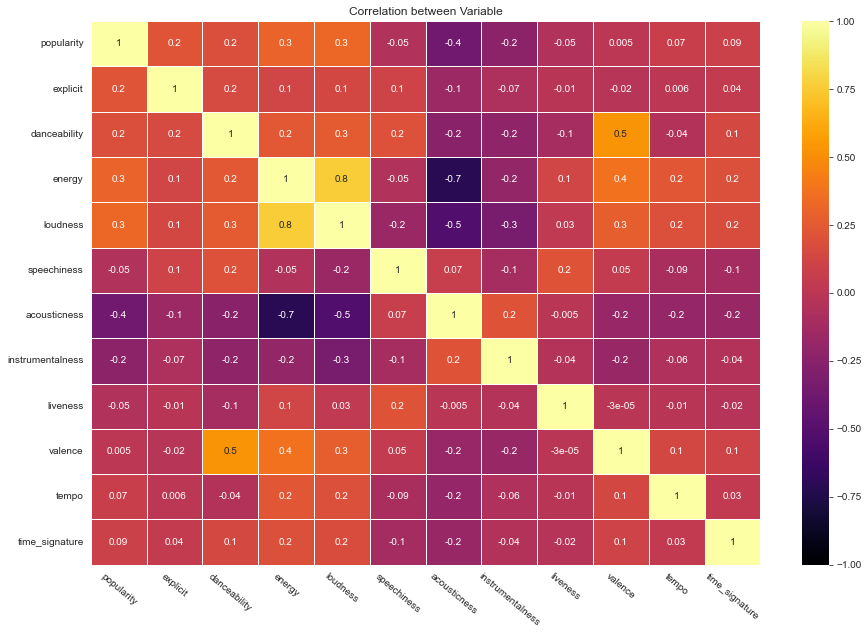

In [163]:
plt.figure(figsize= (15,10))
corr_map = sns.heatmap(df_tracks_corr, annot = True, vmin= -1, vmax = 1, center = 0, cmap = "inferno", linewidths=1,fmt= '.1g')
corr_map.set_title("Correlation between Variable")
corr_map.set_xticklabels(corr_map.get_xticklabels(), rotation = 320)

In [164]:
sample_df = df_tracks.sample(int(0.004*len(df_tracks)))

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

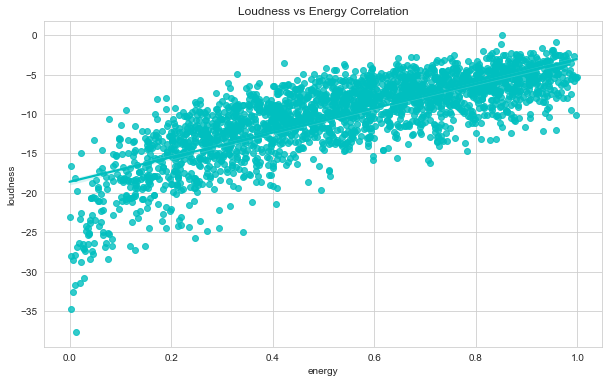

In [165]:
plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = "loudness", x = "energy", color = "c",fit_reg=True).set(title = "Loudness vs Energy Correlation")

[Text(0.5, 1.0, 'Popularity vs Acousticness Correlation')]

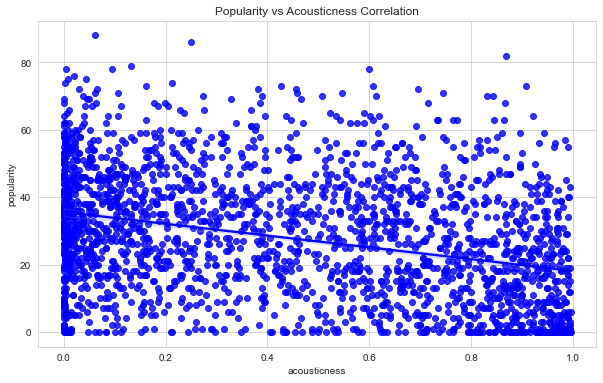

In [166]:
plt.figure(figsize = (10,6))
sns.regplot(data = sample_df, y = "popularity", x = "acousticness", color = "b").set(title = "Popularity vs Acousticness Correlation")

<h3> Change date column to datetime format

In [167]:
df_tracks['dates'] = df_tracks.index.get_level_values('release_date')
df_tracks.dates = pd.to_datetime(df_tracks.dates)

# now get the years only
years = df_tracks.dates.dt.year

<h3> Plot distribution of songs throughout the years

Text(0.5, 1.0, 'Number of songs per year')

<Figure size 720x432 with 0 Axes>

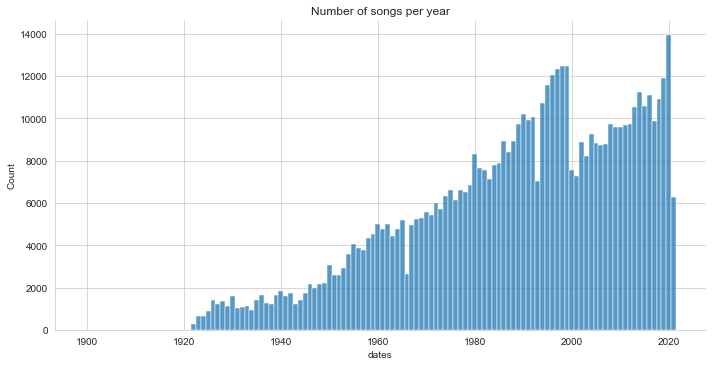

In [168]:
plt.figure(figsize = (10,6))
dist_plot = sns.displot(years, discrete = True, aspect = 2, height = 5, kind = "hist")
plt.title("Number of songs per year")

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

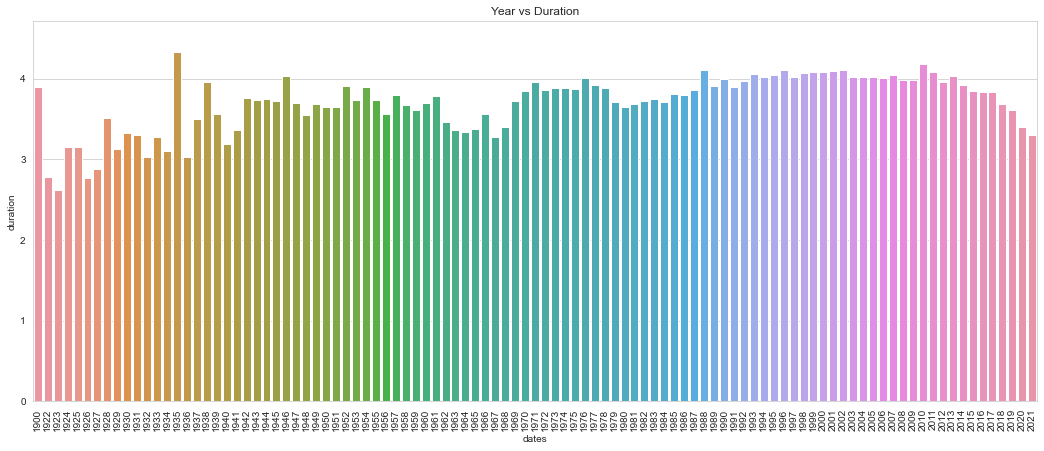

In [169]:
total_duration = df_tracks.duration
fig_dims = (18,7)
fig, ax = plt.subplots(figsize = fig_dims)
fig = sns.barplot(x = years, y = total_duration, ax = ax, errwidth = False)
plt.title("Year vs Duration")
plt.xticks(rotation = 90)

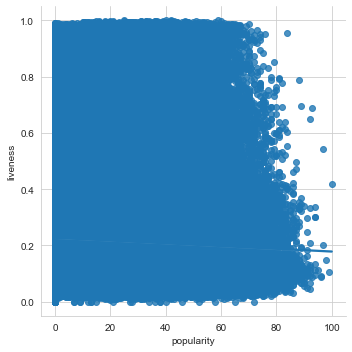

In [170]:
sns.lmplot(data = df_tracks, x = 'popularity', y = 'liveness')

In [171]:
total_dr = df_tracks.duration
sns.set_style(style = "whitegrid")

<h2> Analyzing Genres of the Songs

In [3]:
df_genre = pd.read_csv(r'dataset/SpotifyFeatures.csv')
df_genre.head(5)

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4-Apr,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4-Apr,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,4-May,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4-Apr,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4-Apr,0.390


In [ ]:
df_genre.shape

(232725, 18)

In [9]:
# check missing value
total = df_genre.isnull().sum().sort_values(ascending = True)
percent = (df_genre.isnull().sum() / df_genre.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
genre,0,0.0
tempo,0,0.0
speechiness,0,0.0
mode,0,0.0
loudness,0,0.0
liveness,0,0.0
key,0,0.0
instrumentalness,0,0.0
energy,0,0.0
duration_ms,0,0.0


<h2> Visualizations

Text(0, 0.5, 'Genres')

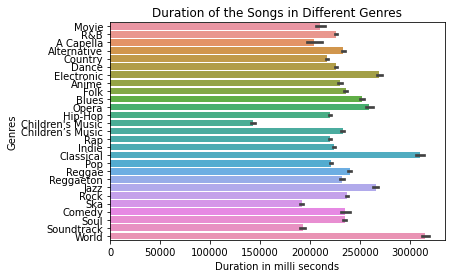

In [10]:
plt.title("Duration of the Songs in Different Genres")
sns.color_palette("rocket", as_cmap=True)
sns.barplot(y = 'genre', x = 'duration_ms', data = df_genre)
plt.xlabel("Duration in milli seconds")
plt.ylabel("Genres")

Text(0.5, 1.0, 'Top 5 Genres by Popularity')

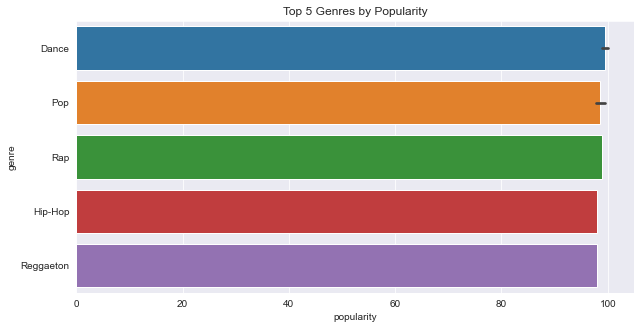

In [12]:
sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
famous = df_genre.sort_values("popularity", ascending = False).head(10)
sns.barplot(y = 'genre', x ="popularity", data = famous)

plt.title("Top 5 Genres by Popularity")